# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

## Objectives:
- **Pertemuan 12**: Master data cleaning and preparation techniques using Pandas.
- **Pertemuan 13**: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.


In [5]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


/tmp/ipykernel_15137/2224635855.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_15137/2224635855.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [9]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks with Titanic-Dataset
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/home/hero/Documents/API/"

!kaggle datasets list

ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sadiajavedd/students-academic-performance-dataset               Students_Academic_Performance_Dataset                    8907  2025-10-23 04:16:35.563000           8243        209  1.0              
zubairamuti/bmw-car-sales-record-2010-2024                      BMW Car Sales Record (2010-2024)                       853356  2025-11-19 04:50:35.480000            736         25  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                   5941  2025-10-26 07:51:53.380000           7577        104  1.0              
shahz

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/home/hero/Documents/API"

!kaggle datasets download -d yasserh/titanic-dataset -p .

import zipfile
with zipfile.ZipFile("titanic-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


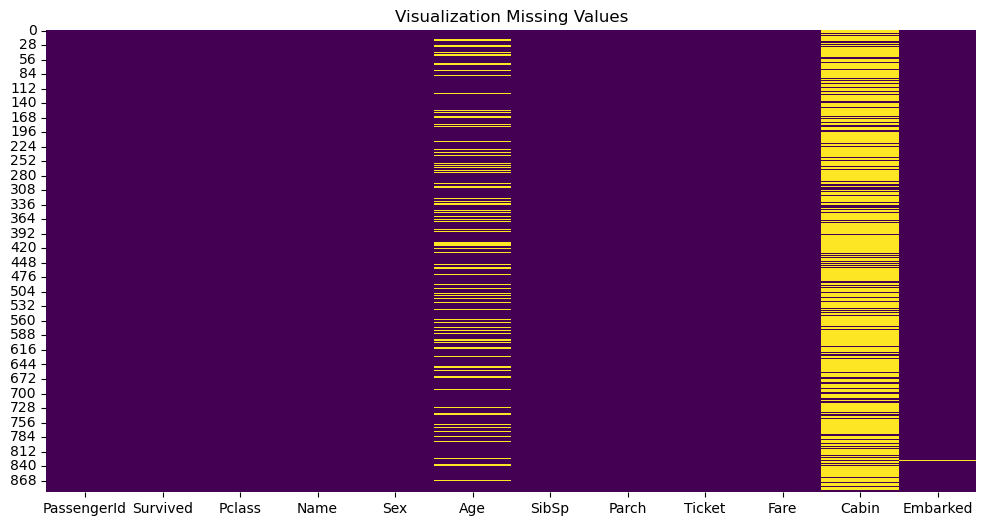

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualization Missing Values")
plt.show()

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Titanic-Dataset.csv")
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,0.015713,NaN,S


## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.


In [ ]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='magenta')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


In [ ]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.
- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.


In [11]:
# Pertemuan 12
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/home/hero/Documents/API"

!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset -p .

import zipfile
with zipfile.ZipFile("diabetes-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall(".") 

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
  0%|                                               | 0.00/8.91k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 18.1MB/s]


In [33]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Missing Values before Cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values 0 → NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Jumlah outlier pada BMI: 8

Data setelah normalisasi:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.670968,0.50000,0.732143,0.527174,0.480499,0.489305,0.637363,1.0
1,0.074074,0.264516,0.40625,0.517857,0.527174,0.262090,0.243316,0.219780,0.0
2,0.592593,0.896774,0.37500,0.517857,0.527174,0.159126,0.529412,0.241758,1.0
3,0.074074,0.290323,0.40625,0.303571,0.000000,0.308892,0.079323,0.000000,0.0
4,0.000000,0.600000,0.00000,0.732143,1.000000,0.776911,1.000000,0.263736,1.0


<Figure size 900x300 with 0 Axes>

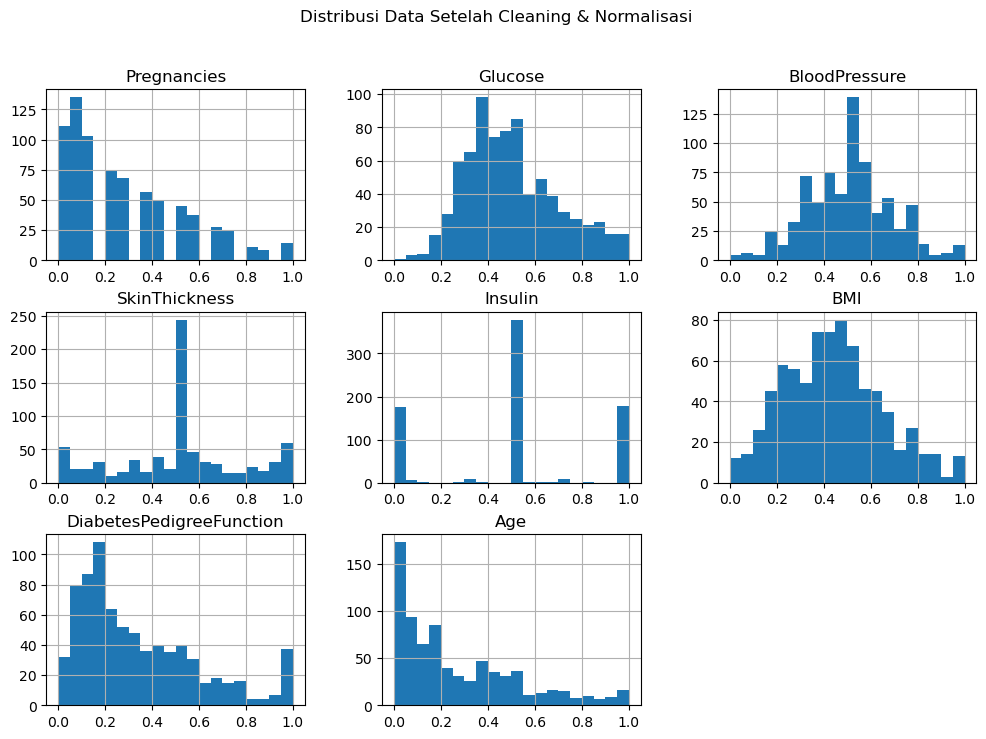

In [2]:
# Task Pertemuan 12
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("diabetes.csv")
df.head()

print("\nMissing Values before Cleaning:")
print(df.isnull().sum())

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

print("\nMissing values 0 → NaN:")
print(df.isnull().sum())

df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

outliers_bmi = detect_outliers_iqr("BMI")
print("\nJumlah outlier pada BMI:", len(outliers_bmi))

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))

num_cols = df.columns.drop("Outcome")

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nData setelah normalisasi:")
display(df.head())

plt.figure(figsize=(9,3))
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribusi Data Setelah Cleaning & Normalisasi")
plt.show()

In [ ]:
# Pertemuan 13